In [1]:
# Author: Roi Yehoshua <roiyeho@gmail.com>
# License: MIT

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

In [2]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', return_X_y=True, as_frame=False)

In [3]:
print(X.shape)

(70000, 784)


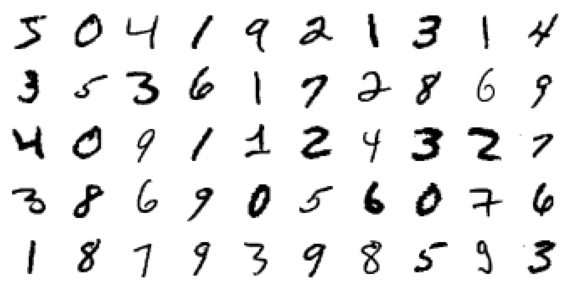

In [4]:
fig, axes = plt.subplots(5, 10, figsize=(10, 5))
i = 0
for ax in axes.flat:
    ax.imshow(X[i].reshape(28, 28), cmap='binary')
    ax.axis('off')    
    i += 1
plt.savefig('figures/digits.pdf')

In [5]:
np.unique(y, return_counts=True)

(array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object),
 array([6903, 7877, 6990, 7141, 6824, 6313, 6876, 7293, 6825, 6958],
       dtype=int64))

In [6]:
X = X / 255

In [7]:
train_size = 60000
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

In [8]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)

C:\Users\roi_y\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [18]:
print(clf.n_iter_)

[795]


In [19]:
print('Training set accuracy: ', np.round(clf.score(X_train, y_train), 4))
print('Test set accuracy:' , np.round(clf.score(X_test, y_test), 4))

Training set accuracy: 0.9393
Test set accuracy: 0.9256


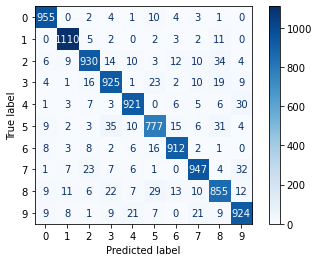

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_test_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap='Blues')

plt.savefig('figures/confusion_matrix.pdf')

In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.92      0.91      1010
           4       0.94      0.94      0.94       982
           5       0.90      0.87      0.88       892
           6       0.94      0.95      0.95       958
           7       0.93      0.92      0.93      1028
           8       0.88      0.88      0.88       974
           9       0.91      0.92      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000



Visualizing the Weights

In [28]:
print(clf.coef_.shape)

(10, 784)


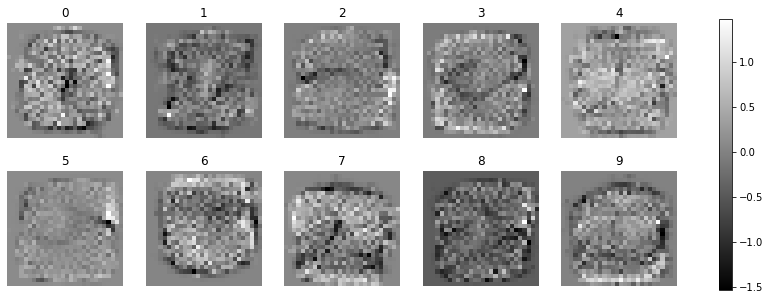

In [56]:
fig, axes = plt.subplots(2, 5, figsize=(15, 5))

digit = 0
for coef, ax in zip(clf.coef_, axes.flat):
    im = ax.imshow(coef.reshape(28, 28), cmap='gray')
    ax.axis('off')
    ax.set_title(str(digit))
    digit += 1
    
fig.colorbar(im, ax=axes.flat)
plt.savefig('figures/model_weights.pdf')